<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/Machine_Learning/MVP_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Problema:

(FALAR DA IMPORTÂNCIA DA QUALIDADE DO AR NA SAÚDE)

(FALAR DAS DOENÇAS ORIUNDAS DA QUALIADE DO AR, E COMO ESTAS PODEM SE TORNAR INCURÁVEIS COMO A ASMA, QUE APESAR DE NÃO TER CURA PODE SER CONTROLADA)

(MELHORAR O TEXTO ABAIXO)
A qualidade do ar é medida pelo índice de qualidade do ar (IQA), assim o banco utilizado foi encontrado na plataforma Kaggle, onde nele encontram-se as avaliações dos poluentes Monóxido de Carbono, Ozônio, Dióxido de Nitrogênio e Material Particulado <2.5

(MELHORAR O TEXTO ABAIXO)
O banco possui a variável de avaliação não apenas dos poluentes, mas também da qualidade do ar "AQI Value" medida em muitas cidades no mundo, considerando os poluentes em questão. Assim a proposta seria construir um modelo de classificação a ser treinado, tendo "AQI Value" como target, de forma a possibilitar que o modelo possa vir a ser usado em avaliações de outras cidades.









## Dicionário de dados:

#### *Poluentes considerados na avaliação do índice de qualidade do ar (IQA)*

##### - **NO2:** Dióxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **CO:** Monóxido de Carbono medido em partes por milhão (ppm)
##### - **NO:** Monóxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **O3:** Ozônio medido Micrograma por Metro Cúbico (µg/m3)
##### - **PM2.5:** Material Particulado <2_5 Micrograma por Metro Cúbico (µg/m3)

---

#### *Variáveis Classificadores da Qualidade do AR*

##### - **NO2 AQI Category:**
##### - **CO AQI Category:**
##### - **NO2 AQI Category:**
##### - **Ozone AQI Category**
##### - **PM2.5 AQI Category**

---

#### *Variáveis Medidoras da Qualidade do AR*

##### - **NO2 AQI Value:**
##### - **CO AQI Value:**
##### - **NO2 AQI Value:**
##### - **Ozone AQI Value:**
##### - **PM2.5 AQI Value:**

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset?select=global+air+pollution+dataset.csv


# Importando bibliotecas

In [95]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca para criação de gráficos dinâmicos
import plotly.express as px # biblioteca para criação de gráficos dinâmicos
import plotly.graph_objects as go
import seaborn as sns # biblioteca para criação de gráficos
import missingno as msno # para tratamento de valores faltantes "missing"
import missingno as ms # para tratamento de valores faltantes "missing"
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.pipeline import Pipeline # biblioteca para uso da função Pipeline
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.preprocessing import StandardScaler # biblioteca para padronização
from sklearn.preprocessing import MinMaxScaler # biblioteca para normalização
from sklearn.model_selection import StratifiedKFold # biblioteca para a separação de treino e teste
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Criando Funções

In [96]:
# Função que cria a variável ordinal para a qualdade do ar

def calcula_classe_qualiar(qualidade):
  vqualidade = qualidade

  if qualidade == "Good":
    return 1
  elif qualidade == "Moderate":
    return 2
  elif qualidade == "Unhealthy":
    return 3
  elif qualidade == "Unhealthy for Sensitive Groups":
    return 4
  elif qualidade == "Very Unhealthy":
    return 5
  else:
    return 6

# ***1 - Carregando o Banco de dados***

In [97]:
# Importando o arquivo em formato csv hospedado em My Drive

dados_vazios = [ " " ]

QualidadeAR = pd.read_csv("https://raw.githubusercontent.com/Luciahelenasantos/POS_GRADUACAO_PUC/main/Machine_Learning/global_air_pollution_dataset.csv", na_values = dados_vazios)

## 1.1 - Conhecendo o banco de dados QualidadeAR

In [98]:
# Mostra a estrutura do banco QualidadeAR

QualidadeAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


## 1.2 - Verificando a existência de Missing em QualidadeAR

Nesta etapa é feita uma análise afim de se identificar quais atributos possuem valores faltantes e sua frequência.

In [99]:
# Mostrando se existem e, caso positivo, o total de valores Missing e quais variáveis

QualidadeAR.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

O comando acima permite verificar que não existem valores faltantes para variáveis numéricas, apenas as variáveis categóricas "Country" e "City" apresentaram Missing com 427 e 1 respectivamente. Assim podemos concluír a não necessidade de recorrer à transformação de imputação de dados faltantes.

In [100]:
#  Mostrar apenas a linha onde a variável City possui o valor Missing

QualidadeAR[QualidadeAR['City'].isnull()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


In [101]:
#  Mostrar apenas a linha onde a variável Country possui valores Missing

QualidadeAR[QualidadeAR['Country'].isnull()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


Ainda que não necessite de tratamento as variáveis com Missing, torna-se importante identificar quais informações estão ausente caso se deseje criar análise estatística relativa a algum país ou cidade. Assim verificamos que apenas uma cidade do país de Israel está sem a denominação, porém, várias cidades não possuem o nome do país a qual pertencem.

In [102]:
# Mostrar o banco QualidadeAR em formato tabular

QualidadeAR

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


## 1.3 - Estatística Descritiva do banco QualidadeAR

In [103]:
QualidadeAR.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


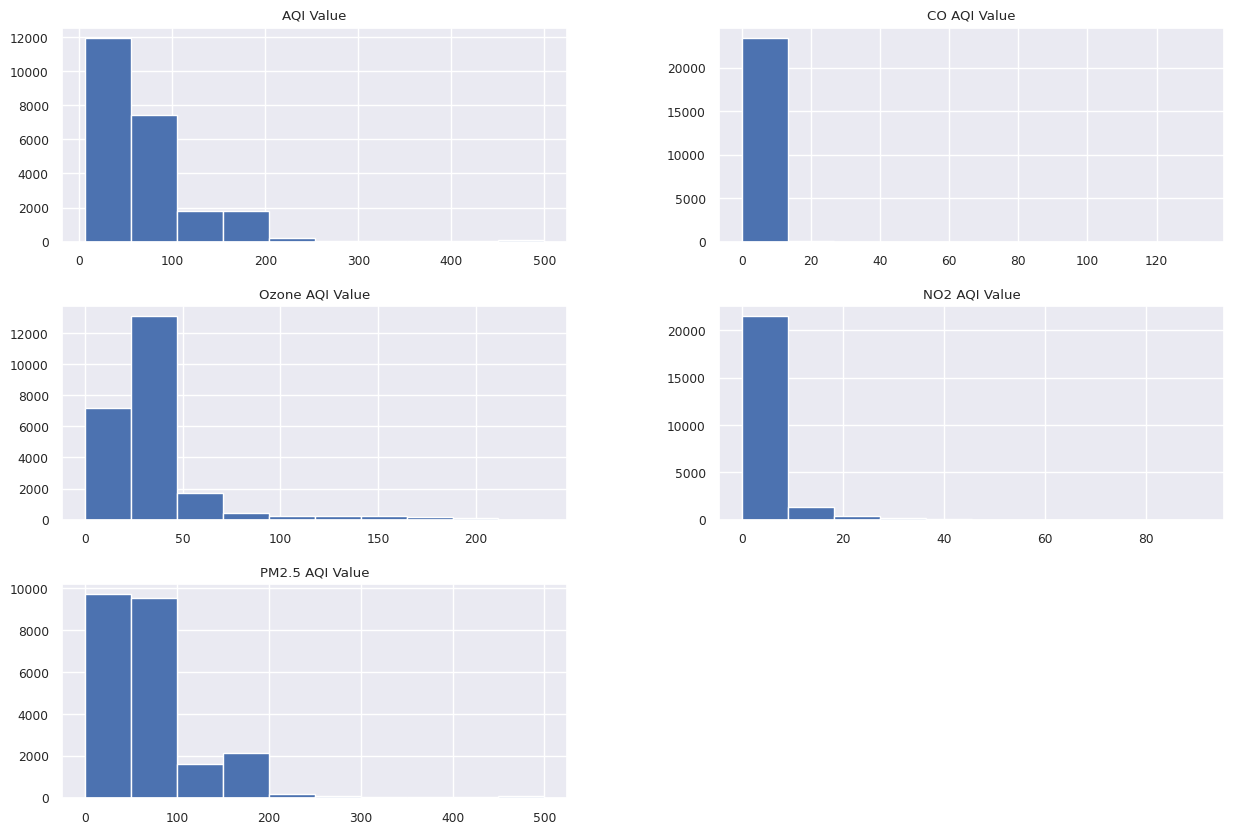

In [104]:
# Gráfico de Histograma dos dados

QualidadeAR.hist(figsize = (15,10))
plt.show()

Como já visto anteriormente não existe variável com distribuição próxima da Normal, nenhuma delas a média e a mediana estão próximas.

# ***2 - Análise Exploratória***

In [105]:
# Mostra o quantitativo das variáveis categóricas

QualidadeAR.describe(include='object')

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,23036,23462,23463,23463,23463,23463,23463
unique,175,23462,6,3,5,2,6
top,United States of America,Praskoveya,Good,Good,Good,Good,Good
freq,2872,1,9936,23460,21069,23448,10208


In [106]:
#COLOCAR HISTOGRAMA COM TODOS

## 2.1 - índice Geral AQI

In [107]:
# Quantitativo das classificações da qualidade para 'AQI Category'

QualidadeAR['AQI Category'].value_counts()

Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: AQI Category, dtype: int64

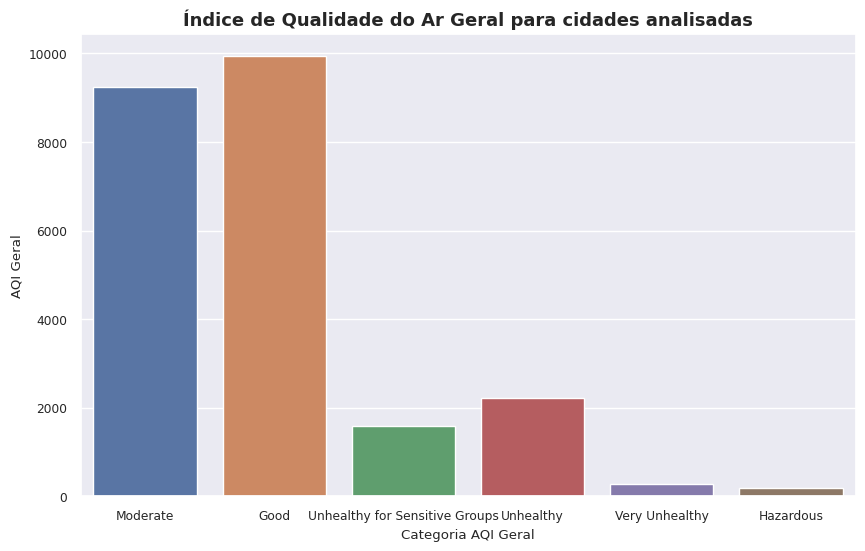

In [108]:
# Gráfico de barras para AQI Geral

fig, ax = plt.subplots(figsize = (10, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)
sns.countplot(x='AQI Category', data=QualidadeAR)
plt.title('Índice de Qualidade do Ar Geral para cidades analisadas', fontsize=13, weight='bold')
plt.ylabel("AQI Geral")
plt.xlabel("Categoria AQI Geral")
plt.show();

In [109]:
# Gráfico de setores da variável 'AQI Category'

pieAQI = px.pie(QualidadeAR,'AQI Category')
pieAQI.update_layout(width=700,height=400,title_text="AQI Cidades")
pieAQI.show()

In [110]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI Cidades")
boxAQI.show()

## 2.2 - *CO*

In [111]:
# Quantitativo das classificações da qualidade para 'AQI Category'

QualidadeAR['CO AQI Category'].value_counts()

Good                              23460
Moderate                              2
Unhealthy for Sensitive Groups        1
Name: CO AQI Category, dtype: int64

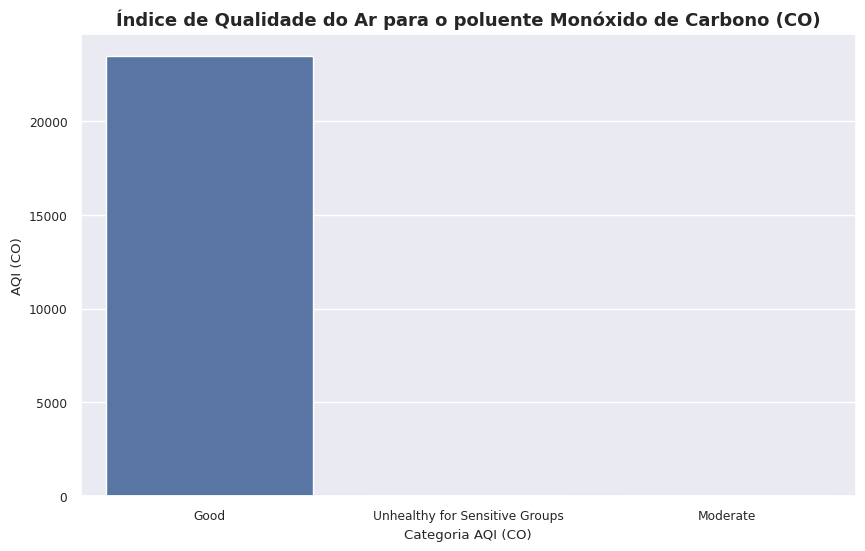

In [112]:
# Gráfico de barras para AQI do Monoxido de Carbono (CO)

fig, ax = plt.subplots(figsize = (10, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)
sns.countplot(x='CO AQI Category', data=QualidadeAR)
plt.title('Índice de Qualidade do Ar para o poluente Monóxido de Carbono (CO)', fontsize=13, weight='bold')
plt.ylabel("AQI (CO)")
plt.xlabel("Categoria AQI (CO)")
plt.show();

In [113]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='CO AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI CO")
boxAQI.show()

## 2.3 - *O3*

In [114]:
# Quantitativo das classificações da qualidade para 'Ozone AQI Category'

QualidadeAR['Ozone AQI Category'].value_counts()

Good                              21069
Moderate                           1445
Unhealthy for Sensitive Groups      491
Unhealthy                           405
Very Unhealthy                       53
Name: Ozone AQI Category, dtype: int64

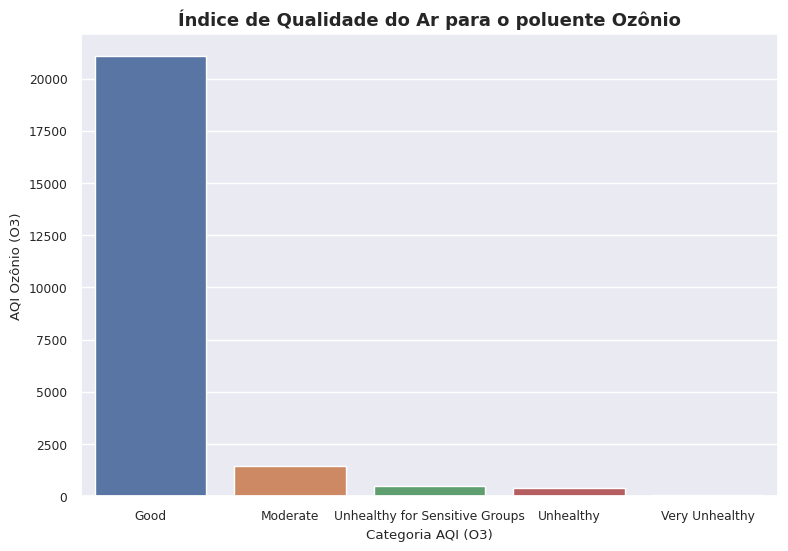

In [115]:
# Gráfico de barras para AQI do Ozônio (O3)

fig, ax = plt.subplots(figsize = (9, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)
sns.countplot(x='Ozone AQI Category', data=QualidadeAR)
plt.title('Índice de Qualidade do Ar para o poluente Ozônio', fontsize=13, weight='bold')
plt.ylabel("AQI Ozônio (O3)")
plt.xlabel("Categoria AQI (O3)")
plt.show();

In [116]:
# Gráfico de setores da variável 'AQI Category'

pieAQI_O3 = px.pie(QualidadeAR,'Ozone AQI Category')
pieAQI_O3.update_layout(width=700,height=400,title_text="AQI Cidades")
pieAQI_O3.show()

In [117]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='Ozone AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI Ozônio")
boxAQI.show()

## 2.4 - *NO2*

In [118]:
# Quantitativo das classificações da qualidade para 'NO2 AQI Category'

QualidadeAR['NO2 AQI Category'].value_counts()

Good        23448
Moderate       15
Name: NO2 AQI Category, dtype: int64

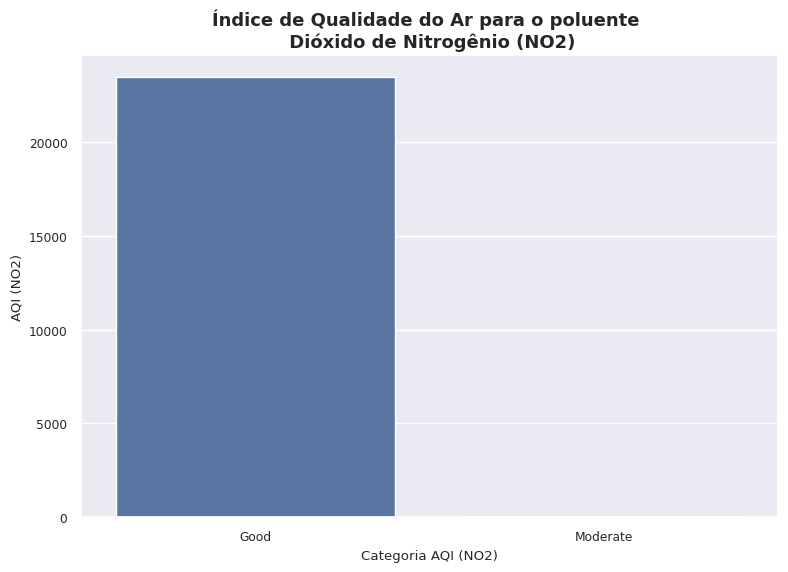

In [119]:
# Gráfico de barras para AQI do Dióxido de Nitrogênio (NO2)

fig, ax = plt.subplots(figsize = (9, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)
sns.countplot(x='NO2 AQI Category', data=QualidadeAR)
plt.title('Índice de Qualidade do Ar para o poluente \n Dióxido de Nitrogênio (NO2)', fontsize=13, weight='bold')
plt.ylabel("AQI (NO2)")
plt.xlabel("Categoria AQI (NO2)")
plt.show();

In [120]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='NO2 AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI NO2")
boxAQI.show()

## 2.5 - *PM2.5*

In [121]:
# Quantitativo das classificações da qualidade para 'PM2.5 AQI Category'

QualidadeAR['PM2.5 AQI Category'].value_counts()

Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: PM2.5 AQI Category, dtype: int64

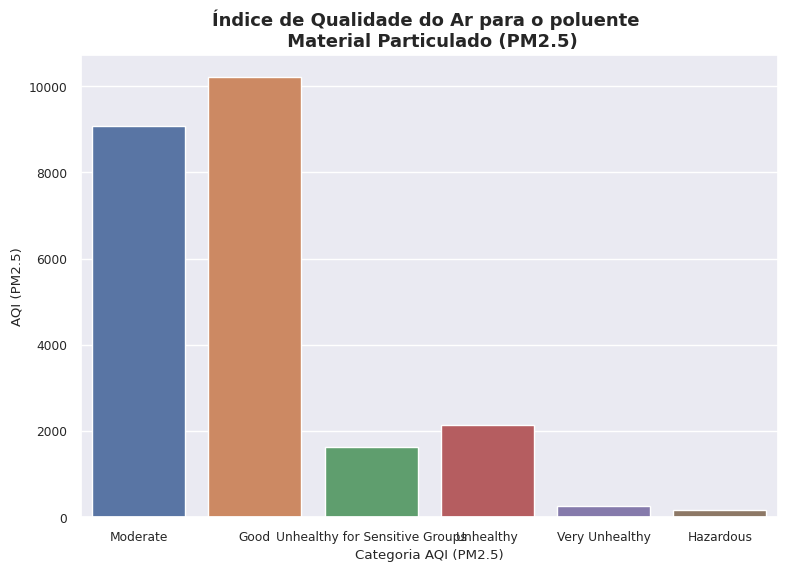

In [122]:
# Gráfico de barras para AQI do Material Particulado <2_5 (PM2.5)

fig, ax = plt.subplots(figsize = (9, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)
sns.countplot(x='PM2.5 AQI Category', data=QualidadeAR)
plt.title('Índice de Qualidade do Ar para o poluente \n Material Particulado (PM2.5)', fontsize=13, weight='bold')
plt.ylabel("AQI (PM2.5)")
plt.xlabel("Categoria AQI (PM2.5)")
plt.show();

In [123]:
# Gráfico de setores da variável 'AQI Category'

pieAQI_PM2_5 = px.pie(QualidadeAR,'PM2.5 AQI Category')
pieAQI_PM2_5.update_layout(width=700,height=400,title_text="AQI Cidades")
pieAQI_PM2_5.show()

In [124]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='PM2.5 AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI PM2.5")
boxAQI.show()

# ***3 - Pré-Processamento***

Transformando as variáveis categóricas nominais em variávies categóricas ordinais

In [125]:
# Criamos uma cópia do banco original QualidadeAR2

QualidadeAR2 = pd.DataFrame.copy(QualidadeAR)

In [126]:
QualidadeAR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [127]:
# Criando a variável numérica que identifica a classificação do AQI para cada poluente

QualidadeAR2['AQI_Category_Num'] = QualidadeAR2['AQI Category'].apply(calcula_classe_qualiar)
QualidadeAR2['CO_AQI_Category_Num'] = QualidadeAR2['CO AQI Category'].apply(calcula_classe_qualiar)
QualidadeAR2['Ozone_AQI_Category_Num'] = QualidadeAR2['Ozone AQI Category'].apply(calcula_classe_qualiar)
QualidadeAR2['NO2_AQI_Category_Num'] = QualidadeAR2['NO2 AQI Category'].apply(calcula_classe_qualiar)
QualidadeAR2['PM2.5_AQI_Category_Num'] = QualidadeAR2['PM2.5 AQI Category'].apply(calcula_classe_qualiar)

In [128]:
QualidadeAR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 23036 non-null  object
 1   City                    23462 non-null  object
 2   AQI Value               23463 non-null  int64 
 3   AQI Category            23463 non-null  object
 4   CO AQI Value            23463 non-null  int64 
 5   CO AQI Category         23463 non-null  object
 6   Ozone AQI Value         23463 non-null  int64 
 7   Ozone AQI Category      23463 non-null  object
 8   NO2 AQI Value           23463 non-null  int64 
 9   NO2 AQI Category        23463 non-null  object
 10  PM2.5 AQI Value         23463 non-null  int64 
 11  PM2.5 AQI Category      23463 non-null  object
 12  AQI_Category_Num        23463 non-null  int64 
 13  CO_AQI_Category_Num     23463 non-null  int64 
 14  Ozone_AQI_Category_Num  23463 non-null  int64 
 15  NO

In [129]:
# Mostrando os 5 primeiros registros

QualidadeAR2.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,AQI_Category_Num,CO_AQI_Category_Num,Ozone_AQI_Category_Num,NO2_AQI_Category_Num,PM2.5_AQI_Category_Num
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,2,1,1,1,2
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,1,1,1,1,1
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,2,1,1,1,2
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,1,1,1,1,1
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,1,1,1,1,1


# ***4 - Separação dos dados em treino e teste***

In [164]:
# Alterando a ordem das colunas do DataFrame QualidadeAR2

QualidadeAR2Previsores1  = QualidadeAR2[['CO_AQI_Category_Num', 'Ozone_AQI_Category_Num', 'NO2_AQI_Category_Num',
                                         'PM2.5_AQI_Category_Num', 'AQI_Category_Num']]

In [165]:
QualidadeAR2Previsores1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CO_AQI_Category_Num     23463 non-null  int64
 1   Ozone_AQI_Category_Num  23463 non-null  int64
 2   NO2_AQI_Category_Num    23463 non-null  int64
 3   PM2.5_AQI_Category_Num  23463 non-null  int64
 4   AQI_Category_Num        23463 non-null  int64
dtypes: int64(5)
memory usage: 916.6 KB


In [166]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
array = QualidadeAR2Previsores1.values
X = array[:,0:4] # atributos
y = array[:,4] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# ***5 - Modelagem - Criação e Avaliação dos Modelos***

## 5.1 - Validação Cruzada - Dados Originais

In [167]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [168]:

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Defining parameters of base classifier for the BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating models for VotingClassifier
bases = []
model1 = DecisionTreeClassifier()
bases.append(('cart', model1))
model2 = SVC()
bases.append(('svm', model2))

In [169]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)

# média e desvio padrão dos 10 resultados da validação cruzada
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.999094 (0.000361)
CART: 0.999148 (0.000353)
NB: 0.886414 (0.002451)
SVM: 0.999148 (0.000458)


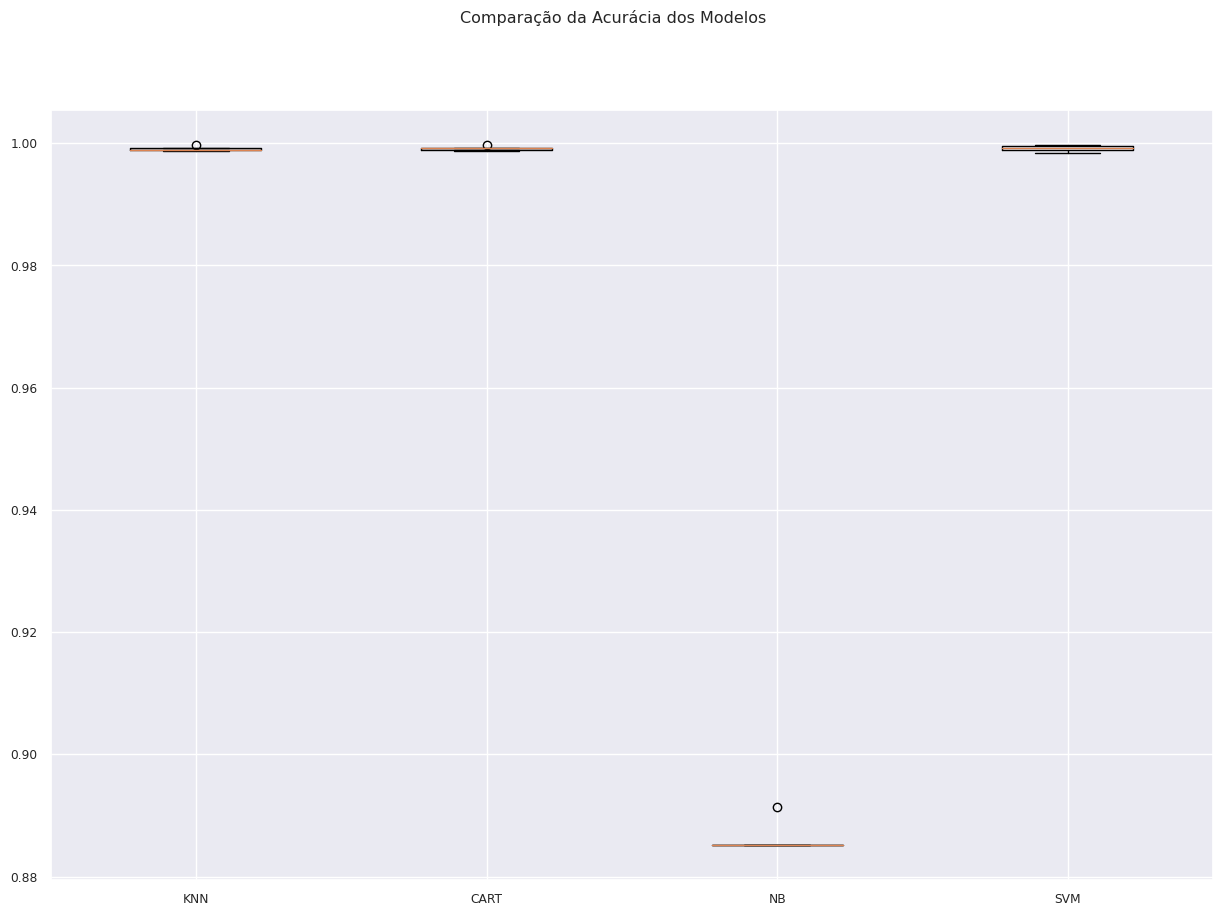

In [170]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5.2 - Validação Cruzada - Dados Padronizados e Normalizados

In [171]:
np.random.seed(7)

pipelines = []
results = []
names = []

#reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

In [172]:
# Padronizando e normalizando os dados

prdz = ('StandarScaler', StandardScaler())
normz = ('MinMaxScaler', MinMaxScaler())

In [173]:
# Verificando os Modelos usando pipelines

# Pipeline com os dados originais

pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

In [174]:
# Pipeline com os dados padronizados

pipelines.append(('KNN-padr', Pipeline([st, knn])))
pipelines.append(('CART-padr', Pipeline([st, cart])))
pipelines.append(('NB-padr', Pipeline([st, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([st, svm])))

In [175]:
# Pipeline com os dados normalizado

pipelines.append(('KNN-norm', Pipeline([nor, knn])))
pipelines.append(('CART-norm', Pipeline([nor, cart])))
pipelines.append(('NB-norm', Pipeline([nor, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([nor, svm])))

In [176]:
pipelines

[('KNN-orig', Pipeline(steps=[('KNN', KNeighborsClassifier())])),
 ('CART-orig', Pipeline(steps=[('CART', DecisionTreeClassifier())])),
 ('NB-orig', Pipeline(steps=[('NB', GaussianNB())])),
 ('SVM-orig', Pipeline(steps=[('SVM', SVC())])),
 ('KNN-padr',
  Pipeline(steps=[('StandarScaler', StandardScaler()),
                  ('KNN', KNeighborsClassifier())])),
 ('CART-padr',
  Pipeline(steps=[('StandarScaler', StandardScaler()),
                  ('CART', DecisionTreeClassifier())])),
 ('NB-padr',
  Pipeline(steps=[('StandarScaler', StandardScaler()), ('NB', GaussianNB())])),
 ('SVM-padr',
  Pipeline(steps=[('StandarScaler', StandardScaler()), ('SVM', SVC())])),
 ('KNN-norm',
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('KNN', KNeighborsClassifier())])),
 ('CART-norm',
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('CART', DecisionTreeClassifier())])),
 ('NB-norm',
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('NB', GaussianNB())]

In [177]:
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN-orig: 0.999094 (0.000361)
CART-orig: 0.999148 (0.000353)
NB-orig: 0.886414 (0.002451)
SVM-orig: 0.999148 (0.000458)
KNN-padr: 0.998828 (0.000574)
CART-padr: 0.999148 (0.000353)
NB-padr: 0.885083 (0.000213)
SVM-padr: 0.999041 (0.000464)
KNN-norm: 0.998828 (0.000574)
CART-norm: 0.999148 (0.000353)
NB-norm: 0.885083 (0.000213)
SVM-norm: 0.999094 (0.000549)


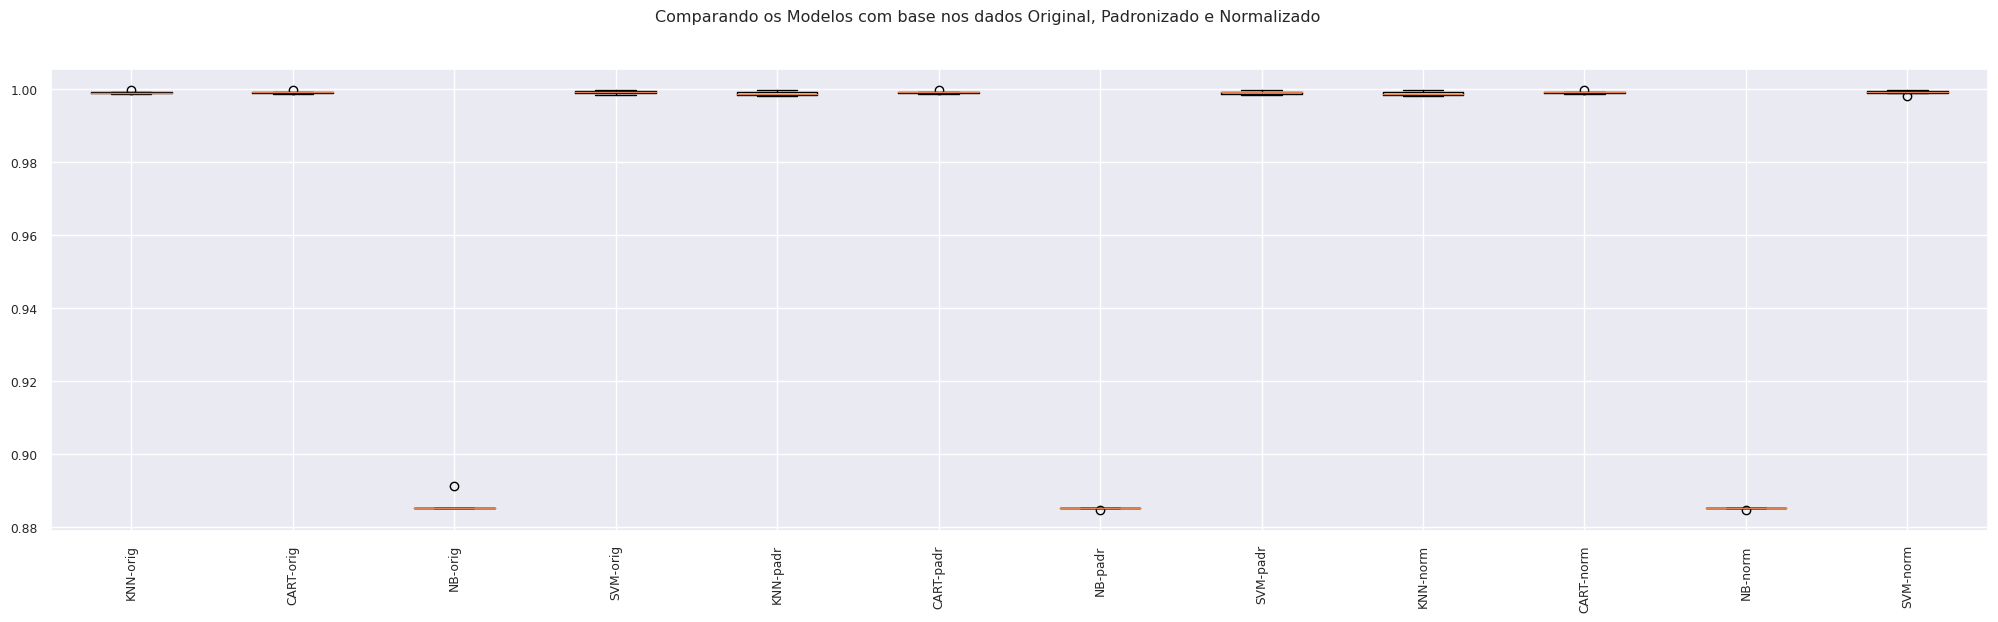

In [186]:
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparando os Modelos com base nos dados Original, Padronizado e Normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# ***6 - Ajuste dos Modelos***

## 6.1 - Ajustando Modelo KNN

In [179]:
np.random.seed(7)

pipelines = []
knn = ('KNN', KNeighborsClassifier())
st_scaler = ('StandarScaler', StandardScaler())
nor_scaler = ('MinMaxScaler', MinMaxScaler())

In [180]:
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-pard', Pipeline(steps=[st_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[nor_scaler, knn])))

In [181]:
# Using Grid Search to perform hyperparameter optimization
param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [182]:
# Imprimindo os melhores ajustes

for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid.fit(X_train, y_train)
  print('Without missing treatment: %s - better: %f using %s' % (name, grid.best_score_, grid.best_params_))

Without missing treatment: knn-orig - better: 0.999201 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Without missing treatment: knn-pard - better: 0.999201 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Without missing treatment: knn-norm - better: 0.999094 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


## 6.2 - Ajustando Modelo SVM

In [183]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

In [184]:
model = SVC()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

Melhor: 0.999148 com {'C': 0.5, 'kernel': 'poly'}
